# 创建数组

In [1]:
import numpy as np 

In [2]:
x = np.arange(8) 

In [3]:
print(x)

[0 1 2 3 4 5 6 7]


# 修改数组形状

In [4]:
a = np.arange(12)
print ('原始数组：',a) 
print ('\n') 

原始数组： [ 0  1  2  3  4  5  6  7  8  9 10 11]




In [5]:
b = a.reshape(3,4) 
print ('修改后的数组：') 
print (b)

修改后的数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [6]:
c = a.reshape(-1,1) 
print ('修改后的数组：') 
print (c)

修改后的数组：
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


# 回归分析的典型应用

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston" #可以在浏览器输入此url查看数据集内容
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) #载入数据集  
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #数据
target = raw_df.values[1::2, 2] #数据对应的标签
feature_names = ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']

In [8]:
data.shape

(506, 13)

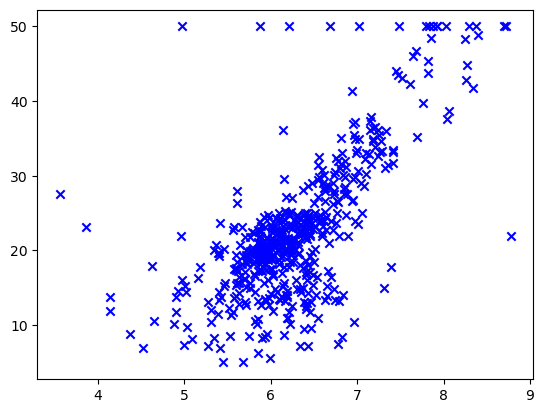

In [9]:
boston_X = data[:,5]  #第六列（房屋数量）逗号前面是行，后面是列
plt.scatter(boston_X, target, color='blue', marker='x')   #画散点图
plt.show()

In [10]:
# 将数据分成训练集和验证集
import random
train_ratio=0.9 #设定训练集和测试集比例
train_index=random.sample(range(boston_X.shape[0]),int(train_ratio*boston_X.shape[0])) #获取训练集序号
test_index=list(set(range(boston_X.shape[0]))-set(train_index)) #获取测试集序号
boston_X_train = boston_X[train_index] 
boston_y_train = target[train_index] 
boston_X_test = boston_X[test_index]
boston_y_test = target[test_index]

##### 

In [11]:
# 创建线性回归对象
regr = linear_model.LinearRegression()

In [12]:
# 使用训练集训练模型
boston_X_train=np.array(boston_X_train).reshape(-1,1)
print(boston_X_train.shape)
regr.fit(boston_X_train, boston_y_train)
# 使用测试集进行预测
boston_X_test=np.array(boston_X_test).reshape(-1,1)
boston_y_pred = regr.predict(boston_X_test)

(455, 1)


In [13]:
from sklearn.metrics import mean_squared_error
# 回归系数
print('Coefficients: ', regr.coef_)
# 均方误差
print("Mean squared error: %.2f"
      % mean_squared_error(boston_y_test, boston_y_pred))

Coefficients:  [9.02759715]
Mean squared error: 24.04


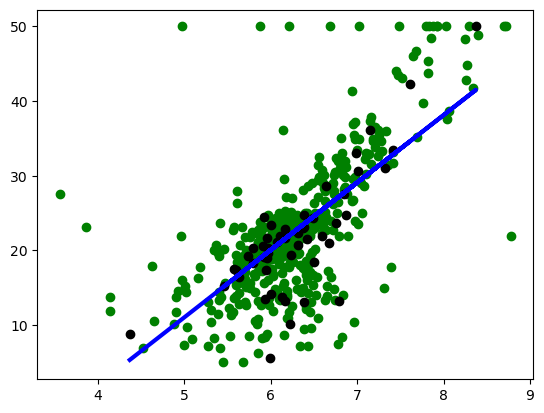

In [14]:
# 绘图
plt.plot(boston_X_test, boston_y_pred, color='blue', linewidth=3) #画折线图
plt.scatter(boston_X_train, boston_y_train,  color='green')
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.show()

# 逻辑回归LogisticRegression分析鸢尾花数据

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris   
from sklearn.linear_model import LogisticRegression 

In [16]:
#载入数据集
iris = load_iris()         
X = iris.data[:, -2:]   #获取花卉后两列数据集
Y = iris.target

In [17]:
#逻辑回归模型

lr = LogisticRegression(C=1e5) #导入模型
lr.fit(X,Y)                    #模型训练
 
#meshgrid函数生成两个网格矩阵
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  #边界加宽
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  #边界加高
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#生成网格中每个点的x,y坐标 

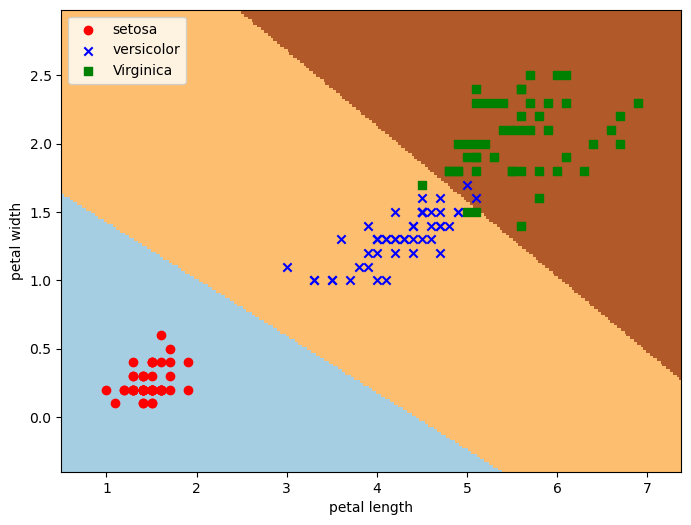

In [18]:
#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
#print(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
'''
    figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
'''
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

#绘制散点图
plt.scatter(X[:50,0], X[:50,1], color='red',marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='s', label='Virginica') 
 
plt.xlabel('petal length')   #x坐标标题
plt.ylabel('petal width')    #y坐标标题
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(loc=2) #图例
plt.show()

In [19]:
print(lr.coef_)

[[ -7.78616334 -17.60247564]
 [  1.01723082   3.58002473]
 [  6.76893252  14.02245091]]


# K-means实现鸢尾花数据的聚类

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

C:\Users\fant_\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


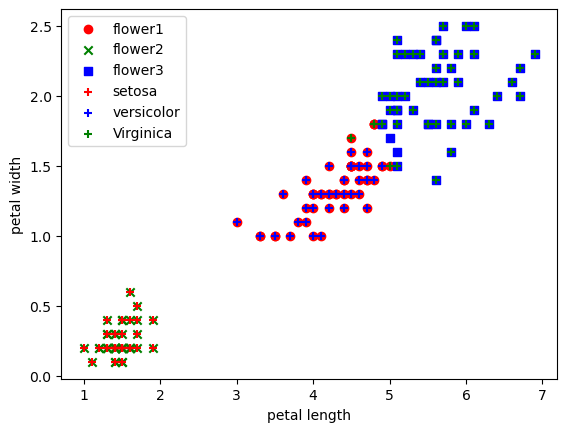

In [21]:
X = iris.data[:,-2:] ##表示我们只取特征空间中的后两个维度
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签
#绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]

plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='flower1')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='x', label='flower2')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='s', label='flower3')

plt.scatter(X[:50,0], X[:50,1], color='red',marker='+', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='+', label='versicolor')
plt.scatter(X[100:,0], X[100:,1], color='green', marker='+', label='Virginica') 
 
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

# 亚洲足球数据

In [22]:
football_asia={
    "feature_name":["国家","2019国际排名","2018世界杯","2015亚洲杯"],
    "country":["中国","伊拉克","阿联酋","乌兹别克斯坦","约旦","叙利亚","印尼","朝鲜",
               "巴林","阿曼","泰国","科威特","卡塔尔","越南","巴勒斯坦","沙特","伊朗",
               "澳洲","韩国","日本"],
    "2019World":[73,91,81,88,118,76,164,110,116,87,122,160,101,102,96,67,34,40,61,60],
    "2018FIFA":[40,40,40,40,50,40,50,50,50,50,40,50,40,50,50,26,18,30,19,15],
    "2015Asia":[7,4,6,8,9,17,17,14,11,12,17,15,13,17,16,10,6,1,2,5]
    }